# EDA

In [1]:
# 表格形状和缺失值检查

import pandas as pd
import numpy as np

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

pd.set_option('display.max_columns', 1000) 
pd.set_option('display.width', 1000) 

print(titanic_train.shape)
print(titanic_test.shape)
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())

(891, 12)
(418, 11)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [2]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_train["Survived"].mean()

0.3838383838383838

### 数值数据 Age, Fare, SibSp, Parch

In [7]:
# 不同年龄群体生还率
print("未成年人平均生还率：")
print(titanic_train.loc[titanic_train["Age"] < 18, "Survived"].mean())
print("成年人平均生还率：")
print(titanic_train.loc[titanic_train["Age"] >= 18, "Survived"].mean())
print("老年人平均生还率：")
print(titanic_train.loc[titanic_train["Age"] >= 65, "Survived"].mean())

未成年人平均生还率：
0.5398230088495575
成年人平均生还率：
0.3810316139767055
老年人平均生还率：
0.09090909090909091


32.204207968574636


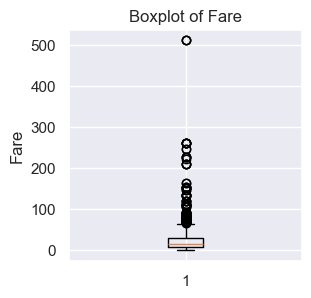

高消费群体（平均消费及以上）平均生还率：
0.5971563981042654
低消费群体（平均消费以下）平均生还率：
0.3176470588235294


In [8]:
# 比较花销
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

print(titanic_train["Fare"].mean())

plt.figure(figsize = (3, 3))
plt.boxplot(titanic_train["Fare"], meanline = True)
plt.title("Boxplot of Fare")
plt.ylabel("Fare")
plt.show()

print("高消费群体（平均消费及以上）平均生还率：")
print(titanic_train.loc[titanic_train["Fare"] >= titanic_train["Fare"].mean(), "Survived"].mean())
print("低消费群体（平均消费以下）平均生还率：")
print(titanic_train.loc[titanic_train["Fare"] < titanic_train["Fare"].mean(), "Survived"].mean())

由箱线图看来，贫富差距很明显，异常值需要处理；不同贫富群体生还率不同  

            Age      Fare     SibSp     Parch
Age    1.000000  0.096067 -0.308247 -0.189119
Fare   0.096067  1.000000  0.159651  0.216225
SibSp -0.308247  0.159651  1.000000  0.414838
Parch -0.189119  0.216225  0.414838  1.000000


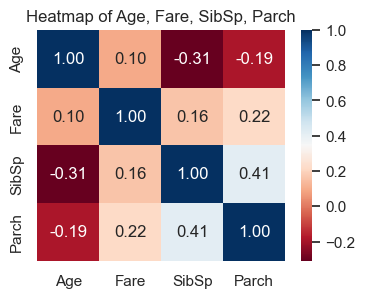

In [9]:
print(titanic_train[['Age', 'Fare', 'SibSp', 'Parch']].corr())
plt.figure(figsize = (4, 3))
sns.heatmap(titanic_train[['Age', 'Fare', 'SibSp', 'Parch']].corr(), cmap = 'RdBu', annot = True, fmt=".2f")
plt.title("Heatmap of Age, Fare, SibSp, Parch")
plt.show()

### 分类数据 Sex, Pclass, Embarked

In [10]:
# 透视表
pivot_survived_Sex = titanic_train.pivot_table('PassengerId', index = 'Sex', columns = 'Survived', aggfunc = len)
print(pivot_survived_Sex)

pivot_survived_Pclass = titanic_train.pivot_table('PassengerId', index = 'Pclass', columns = 'Survived', aggfunc = len)
print(pivot_survived_Pclass)

pivot_survived_Embarked = titanic_train.pivot_table('PassengerId', index = 'Embarked', columns = 'Survived', aggfunc = len)
print(pivot_survived_Embarked)

Survived    0    1
Sex               
female     81  233
male      468  109
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


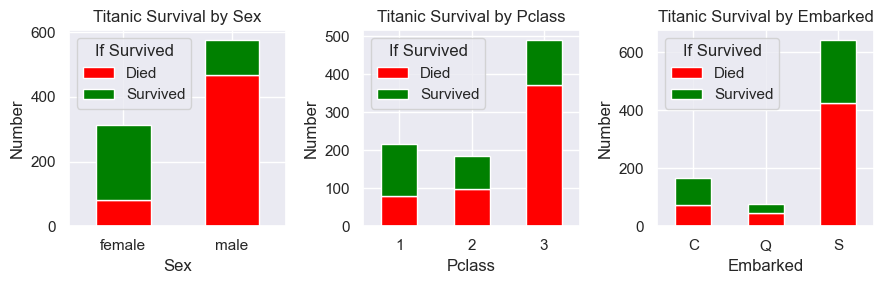

In [11]:
# 堆叠条形图
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (9, 3))

pivot_survived_Sex.plot(kind = 'bar', stacked = True, ax = axes[0], color = ['red', 'green'])
axes[0].set_title('Titanic Survival by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Number')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 0)
axes[0].legend(title='If Survived', labels=['Died', 'Survived'])

pivot_survived_Pclass.plot(kind = 'bar', stacked = True, ax = axes[1], color = ['red', 'green'])
axes[1].set_title('Titanic Survival by Pclass')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Number')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='If Survived', labels=['Died', 'Survived'])

pivot_survived_Embarked.plot(kind = 'bar', stacked = True, ax = axes[2], color = ['red', 'green'])
axes[2].set_title('Titanic Survival by Embarked')
axes[2].set_xlabel('Embarked')
axes[2].set_ylabel('Number')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
axes[2].legend(title='If Survived', labels=['Died', 'Survived'])

plt.tight_layout()
plt.show()

根据条形图，可以从三个维度上得出初步结论：  
1. 相对于男性，女性生还率更高
2. 头等舱生还率最高，其次是二等，最后是三等
3. 生还率与登船港口之间似乎还不能看出什么直接关系

# 缺失值和异常值处理

In [12]:
# 缺失值
titanic_train.fillna({'Age': titanic_train['Age'].median(), 'Cabin': 'Unknown', 'Embarked': 'S'}, inplace = True)
print(titanic_train.isnull().sum().sum())

titanic_test.fillna({'Age': titanic_train['Age'].median(), 'Cabin': 'Unknown', 'Fare': titanic_train['Fare'].mean()}, inplace = True)
print(titanic_test.isnull().sum().sum())

0
0


In [13]:
# 古怪的年龄，我选择四舍五入
titanic_train['Age'] = titanic_train['Age'].round()
titanic_test['Age'] = titanic_test['Age'].round()

In [14]:
# 异常值
Q1 = titanic_train['Fare'].quantile(0.25)
Q3 = titanic_train['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
outliers_condition = (titanic_train['Fare'] > upper_bound)

for pclass in titanic_train['Pclass'].unique():
    pclass_median = titanic_train[titanic_train['Pclass'] == pclass]['Fare'].median()
    titanic_train.loc[outliers_condition & (titanic_train['Pclass'] == pclass), 'Fare'] = pclass_median
print(titanic_train[['Pclass', 'Fare']].head())

outliers_condition = (titanic_test['Fare'] > upper_bound)
for pclass in titanic_test['Pclass'].unique():
    pclass_median = titanic_test[titanic_test['Pclass'] == pclass]['Fare'].median()
    titanic_test.loc[outliers_condition & (titanic_test['Pclass'] == pclass), 'Fare'] = pclass_median
print(titanic_test[['Pclass', 'Fare']].head())

   Pclass     Fare
0       3   7.2500
1       1  60.2875
2       3   7.9250
3       1  53.1000
4       3   8.0500
   Pclass     Fare
0       3   7.8292
1       3   7.0000
2       2   9.6875
3       3   8.6625
4       3  12.2875


# 特征工程

In [15]:
titanic_train['ismale'] = titanic_train['Sex'].replace({'male': 1, 'female': 0}).infer_objects()
titanic_test['ismale'] = titanic_test['Sex'].replace({'male': 1, 'female': 0}).infer_objects()

C:\Users\W11\AppData\Local\Temp\ipykernel_33392\1074710181.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_train['ismale'] = titanic_train['Sex'].replace({'male': 1, 'female': 0}).infer_objects()
C:\Users\W11\AppData\Local\Temp\ipykernel_33392\1074710181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_test['ismale'] = titanic_test['Sex'].replace({'male': 1, 'female': 0}).infer_objects()


In [16]:
import re

pattern = r'(Mr\.|Mrs\.|Miss\.|Master\.|Dr\.)'
title_mapping = {'Mr.': 1, 'Mrs.': 2, 'Miss.': 3, 'Master.': 4, 'Dr.': 5}
titanic_train['Title'] = titanic_train['Name'].str.extract(pattern, flags=re.IGNORECASE)
titanic_train['Title'] = titanic_train['Title'].map(title_mapping).fillna(0).astype(int)
titanic_test['Title'] = titanic_test['Name'].str.extract(pattern, flags=re.IGNORECASE)
titanic_test['Title'] = titanic_test['Title'].map(title_mapping).fillna(0).astype(int)

print(titanic_train.loc[titanic_train['Title'] == 0, 'Name'])
print(titanic_test.loc[titanic_test['Title'] == 0, 'Name'])

30                              Uruchurtu, Don. Manuel E
149                    Byles, Rev. Thomas Roussel Davids
150                           Bateman, Rev. Robert James
249                        Carter, Rev. Ernest Courtenay
369                        Aubart, Mme. Leontine Pauline
443                            Reynaldo, Ms. Encarnacion
449                       Peuchen, Major. Arthur Godfrey
536                    Butt, Major. Archibald Willingham
556    Duff Gordon, Lady. (Lucille Christiana Sutherl...
599         Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
626                       Kirkland, Rev. Charles Leonard
641                                 Sagesser, Mlle. Emma
647                  Simonius-Blumer, Col. Oberst Alfons
694                                      Weir, Col. John
710     Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
745                         Crosby, Capt. Edward Gifford
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
822                      Reuchl

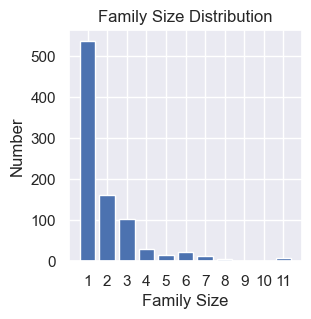

In [17]:
titanic_train['FamilySize'] = titanic_train['Parch'] + titanic_train['SibSp'] + 1
titanic_test['FamilySize'] = titanic_test['Parch'] + titanic_test['SibSp'] + 1

plt.figure(figsize = (3, 3))
plt.bar(titanic_train['FamilySize'].value_counts().index.astype(int), titanic_train['FamilySize'].value_counts().values)
plt.title('Family Size Distribution')
plt.xticks(range(int(titanic_train['FamilySize'].value_counts().index.min()), int(titanic_train['FamilySize'].value_counts().index.max()) + 1))
plt.xlabel('Family Size')
plt.ylabel('Number')
plt.show()

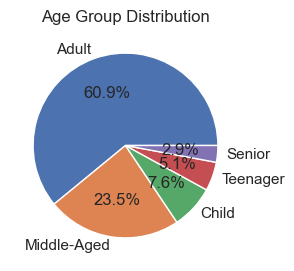

In [18]:
age_bins = [0, 12, 18, 35, 60, 100]  
age_labels = range(1, 6)
titanic_train['AgeGroup'] = pd.cut(titanic_train['Age'], bins = age_bins, labels = age_labels, right = False)
titanic_test['AgeGroup'] = pd.cut(titanic_test['Age'], bins = age_bins, labels = age_labels, right = False)

age_group_labels = {
    1: 'Child', 
    2: 'Teenager', 
    3: 'Adult', 
    4: 'Middle-Aged', 
    5: 'Senior'
}
age_counts = titanic_train['AgeGroup'].value_counts()
plt.figure(figsize = (3, 3))
plt.pie(age_counts, labels = [age_group_labels[i] for i in age_counts.index], autopct = '%1.1f%%')
plt.title("Age Group Distribution")
plt.show()

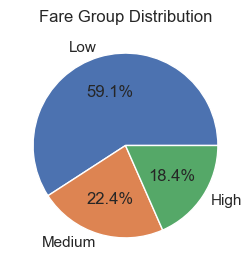

In [19]:
fare_bins = [0, 20, 40, 70]
fare_labels = range(1, 4)
titanic_train['FareGroup'] = pd.cut(titanic_train['Fare'], bins = fare_bins, labels = fare_labels, right = False)
titanic_test['FareGroup'] = pd.cut(titanic_test['Fare'], bins = fare_bins, labels = fare_labels, right = False)

fare_group_labels = {
    1: 'Low', 
    2: 'Medium', 
    3: 'High'
}
fare_counts = titanic_train['FareGroup'].value_counts()
plt.figure(figsize = (3, 3))
plt.pie(fare_counts, labels = [fare_group_labels[i] for i in fare_counts.index], autopct = '%1.1f%%')
plt.title("Fare Group Distribution")
plt.show()

In [20]:
embarked_labels = {
    'S': 1,
    'Q': 2,
    'C': 3
}
titanic_train['Embarked'] = titanic_train['Embarked'].map(embarked_labels)
titanic_test['Embarked'] = titanic_test['Embarked'].map(embarked_labels)
print(titanic_train.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare    Cabin  Embarked  ismale  Title  FamilySize AgeGroup FareGroup
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500  Unknown         1       1      1           2        3         1
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  60.2875      C85         3       0      2           2        4         3
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250  Unknown         1       0      3           1        3         1
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000     C123         1       0      2           2

# 预测

In [21]:
num_features = ['Age', 'Fare', 'FamilySize']
cat_features = ['ismale', 'Title', 'AgeGroup', 'FareGroup', 'Embarked', 'Pclass']
features = num_features + cat_features

# 数值特征：皮尔逊相关系数
from scipy import stats
for feature in num_features:
    correlation, p_value = stats.pearsonr(titanic_train[feature], titanic_train['Survived'])
    print(f'pearson {feature}: correlation = {correlation}, p_value = {p_value}')

pearson Age: correlation = -0.0645773530147662, p_value = 0.05399020099514978
pearson Fare: correlation = 0.3538891169180894, p_value = 1.1100247338047425e-27
pearson FamilySize: correlation = 0.016638989282745213, p_value = 0.6198911221343032


考虑移除FamilySize这一特征，对于Age，鉴于EDA中认为它对结果还是有一定影响，暂时保留

In [22]:
num_features.remove('FamilySize')

In [ ]:
# 分类特征：卡方检验
from sklearn.feature_selection import chi2

x_cat = titanic_train[cat_features]  
y = titanic_train['Survived'] 
chi2_stat, p_value = chi2(x_cat, y)

chi2_results = pd.DataFrame({
    'Feature': x_cat.columns,
    'Chi2 Stat': chi2_stat,
    'P Value': p_value
})
print(chi2_results)

     Feature  Chi2 Stat       P Value
0     ismale  92.702447  6.077838e-22
1      Title  99.280582  2.191463e-23
2   AgeGroup   1.355409  2.443347e-01
3  FareGroup  35.618837  2.399559e-09
4   Embarked  10.711086  1.064955e-03
5     Pclass  30.873699  2.753786e-08


对于AgeGroup考虑移除（而且已经保留了Age，存在多重共线性影响）

In [24]:
cat_features.remove('AgeGroup')
features = num_features + cat_features
print(features)

['Age', 'Fare', 'ismale', 'Title', 'FareGroup', 'Embarked', 'Pclass']


权且保留这部分特征，但显然还有多重共线性影响（比如Fare和FareGroup），预计在Logistic回归中使用L1正则化

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = titanic_train[features].copy()
X_test = titanic_test[features].copy()
y = titanic_train['Survived'].copy()
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])
print(X.head())
print(X_test.head())

        Age      Fare  ismale  Title FareGroup  Embarked  Pclass
0 -0.565459 -0.827423       1      1         1         1       3
1  0.664317  2.016315       0      2         3         3       1
2 -0.258015 -0.791231       0      3         1         1       3
3  0.433734  1.630939       0      2         3         1       1
4  0.433734 -0.784529       1      1         1         1       3
        Age      Fare  ismale  Title FareGroup  Embarked  Pclass
0  0.356873 -0.796367       1      1         1         2       3
1  1.356065 -0.840827       0      2         1         1       3
2  2.508980 -0.696730       1      1         1         2       2
3 -0.181154 -0.751688       1      1         1         1       3
4 -0.565459 -0.557325       0      2         1         1       3


In [ ]:
X = X.values
X_test = X_test.values
y = y.values

model = LogisticRegression(penalty = 'l1', solver = 'liblinear') 
model.fit(X, y)
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [32]:
titanic_test['Survived'] = y_pred
submit = titanic_test[['PassengerId', 'Survived']]
submit.to_csv('submit_01.csv', index = False)

### 进行了第一次提交！
主要精力放在了特征工程上，但是对回归模型还有许多完善的空间  
改进方向也许是对train进行分割和交叉验证，修改回归模型，也可以尝试随机森林和SVC

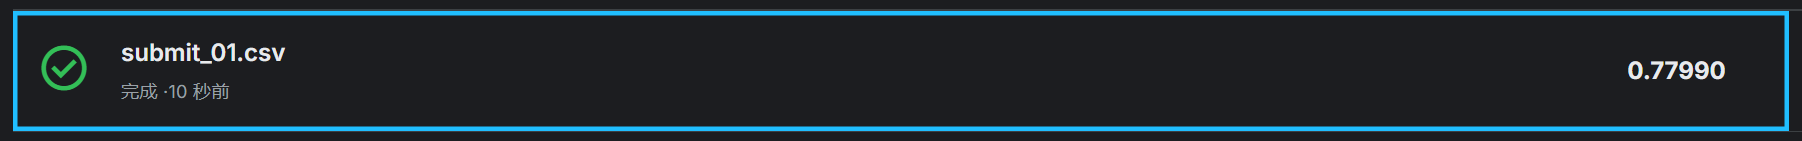